In [1]:
import scipy.io


In [2]:
npy_data = '/mnt/18T-Data/kradar/3/radar_polar_cube/DRAE_00024.npy'

In [2]:
import numpy as np

In [8]:
mat = scipy.io.loadmat('/mnt/Kradar/K-Radar/11/radar_tesseract/tesseract_00004.mat')

In [73]:
arr = mat3d['arr_zyx']

In [74]:
positive_numbers = arr[arr > 0]
positive_numbers.min()


3665671426.871806

In [84]:
mat['arrDREA'].min()*1e-4

0.01558021697998047

In [75]:
positive_numbers.max()

235446028022348.03

In [83]:
mat['arrDREA'].max()*1e-4

139841551305434.73

In [172]:
data = np.log10(mat['arrDREA']).astype(np.float32)

In [122]:
import torch

In [175]:
data = torch.tensor(np.log10(mat['arrDREA']).astype(np.float32))

In [176]:
cube = data.mean(0)
thr_vale = cube.quantile(0.8)
range_ind, elevation_ind, azimuth_ind = torch.where(cube > thr_vale)
power_val = data[:,range_ind, elevation_ind, azimuth_ind]


In [177]:
range_ind, elevation_ind, azimuth_ind = np.array(range_ind),np.array(elevation_ind),np.array(azimuth_ind)

In [178]:
power_val = np.array(power_val)

In [180]:
power_val.dtype

dtype('float32')

In [159]:
np.savez('/mnt/Kradar/K-Radar/11/sparse.npz',range_ind=range_ind, elevation_ind=elevation_ind, azimuth_ind=azimuth_ind, power_val=power_val)

In [1]:
data = np.load('/mnt/Kradar/K-Radar/11/sparse.npz')
data['range_ind']

NameError: name 'np' is not defined

In [2]:
import numpy as np

In [4]:
data = np.load('/mnt/18T-Data/kradar/11/radar_polar_sparse/Sparse_00001.npz')
data['power_val']

array([[17.14819  , 16.65702  , 16.75126  , ..., 11.21244  , 11.100081 ,
        11.496928 ],
       [12.793474 , 12.901154 , 12.937762 , ..., 10.56402  , 10.552122 ,
        10.397634 ],
       [12.253381 , 12.389488 , 12.415735 , ..., 10.981703 , 11.145944 ,
        10.552735 ],
       ...,
       [11.740722 , 11.968316 , 11.921787 , ..., 10.95047  , 10.923238 ,
        10.328402 ],
       [11.974423 , 12.10527  , 12.175252 , ..., 11.28662  , 11.271672 ,
        10.936397 ],
       [12.813876 , 12.996265 , 12.890157 , ..., 10.1178465,  9.988309 ,
        10.040075 ]], dtype=float32)

In [44]:
cube = mat['arrDREA'].mean(0)
cube.shape

(256, 37, 107)

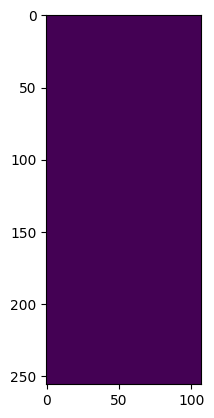

In [46]:
flat = cube.max(1)
import matplotlib.pyplot as plt
plt.imshow(flat)

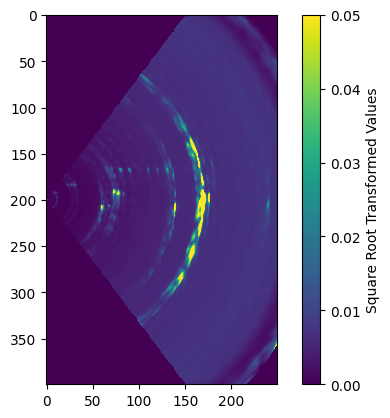

In [198]:
flat = mat3d['arr_zyx'].mean(0)
flat /= 1e13
# flat = np.log10(flat)
# flat *= 1/flat.max()
import matplotlib.pyplot as plt
plt.imshow(flat, cmap='viridis', interpolation='nearest',vmin=0,vmax=0.05)
plt.colorbar(label='Square Root Transformed Values')

In [55]:
mat3d['arr_zyx']

3313144280.71875

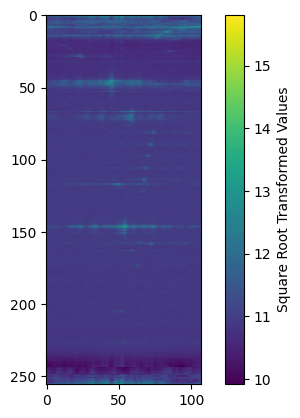

In [9]:
cube = mat['arrDREA'].mean(0)
flat = cube.mean(1)
flat = np.log10(flat)
# flat *= 1/flat.max()
import matplotlib.pyplot as plt
plt.imshow(flat)
plt.imshow(flat, cmap='viridis', interpolation='nearest')
plt.colorbar(label='Square Root Transformed Values')

In [24]:
cube = mat['arrDREA'].mean(0)



In [25]:
import torch.nn.functional as F

In [26]:
# output_tensor = np.zeros_like(cube)

# # Loop through each 'range' and 'azi' index
# for i in range(cube.shape[0]):    # range dimension
#     for j in range(cube.shape[1]):  # azi dimension
#         # Find the index of the maximum value in the 'ele' line
#         max_index = np.argmax(cube[i, j, :])
        
#         # Set only the maximum value in the output tensor, others remain zero
#         output_tensor[i, j, max_index] = cube[i, j, max_index]
cube = mat['arrDREA'].mean(0)

max_values = np.max(cube, axis=(1, 2), keepdims=True)

# Step 3: Create a mask where each element is 1 if it equals the max value in its range bin, 0 otherwise
mask = cube == max_values

# Step 4: Apply the mask to the original tensor
result_tensor = cube * mask
flat = result_tensor.mean(2)
flat = np.log10(flat)

In [23]:
import torch

# Example tensor data - replace this with your actual tensor data
range_indices = torch.tensor([0, 0, 1, 1, 2, 2])
azimuth_indices = torch.tensor([0, 0, 1, 1, 2, 2])
elevation_indices = torch.tensor([5, 6, 5, 6, 5, 6])
power_values = torch.tensor([10, 20, 30, 40, 50, 60])

# Stack the range and azimuth indices to form pairs
indices = torch.stack((range_indices, azimuth_indices), dim=1)

# Find unique pairs and prepare to gather the maximum for each pair
unique_pairs, inverse_indices = torch.unique(indices, dim=0, return_inverse=True)

# Initialize tensors for maximum power values and corresponding elevation indices
max_powers = torch.zeros(unique_pairs.size(0), dtype=power_values.dtype)
max_elev_indices = torch.zeros(unique_pairs.size(0), dtype=elevation_indices.dtype)

# Iterate over all entries
for i, power in enumerate(power_values):
    idx = inverse_indices[i]
    if power > max_powers[idx]:
        max_powers[idx] = power
        max_elev_indices[idx] = elevation_indices[i]

# Results in tensors
new_range_indices = unique_pairs[:, 0]
new_azimuth_indices = unique_pairs[:, 1]
new_elevation_indices = max_elev_indices
new_power_values = max_powers

# Output the results
print("Range Indices:", new_range_indices)
print("Azimuth Indices:", new_azimuth_indices)
print("Elevation Indices:", new_elevation_indices)
print("Power Values:", new_power_values)


Range Indices: tensor([0, 1, 2])
Azimuth Indices: tensor([0, 1, 2])
Elevation Indices: tensor([6, 6, 6])
Power Values: tensor([20, 40, 60])


In [28]:
result_tensor.shape

(256, 37, 107)

/home/xiangyu/miniconda3/envs/surroundocc/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log10
  


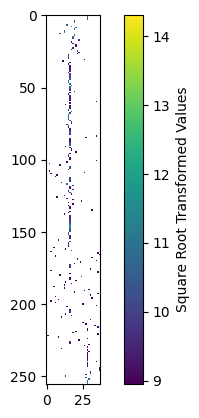

In [29]:
flat = result_tensor.mean(2)
flat = np.log10(flat)
# flat *= 1/flat.max()
import matplotlib.pyplot as plt
plt.imshow(flat)
plt.imshow(flat, cmap='viridis', interpolation='nearest')
plt.colorbar(label='Square Root Transformed Values')

In [30]:
import torch

def multichannel_trilinear_interpolation_optimized(polar_data, azimuth_idx, elevation_idx, range_idx):
    # Dimensions

    num_channels, num_range, num_azimuth, num_elevation = polar_data.shape
    
    # Create a mesh grid and calculate indices and fractions
    azimuth_floor = torch.floor(azimuth_idx).long()
    elevation_floor = torch.floor(elevation_idx).long()
    range_floor = torch.floor(range_idx).long()
    azimuth_frac = azimuth_idx - azimuth_floor
    elevation_frac = elevation_idx - elevation_floor
    range_frac = range_idx - range_floor
    
    # Compute valid mask
    valid = (azimuth_floor >= 0) & (azimuth_floor < num_azimuth - 1) & (elevation_floor >= 0) & (elevation_floor < num_elevation - 1) & (range_floor >= 0) & (range_floor < num_range - 1)
    
    # Prepare grids for interpolation
    grid = torch.stack((range_idx, azimuth_idx, elevation_idx), dim=-1)
    grid = grid.unsqueeze(0)  # add batch dimension for grid_sample
    grid[..., 0] = 2 * grid[..., 0] / (num_range - 1) - 1  # normalize to [-1, 1]
    grid[..., 1] = 2 * grid[..., 1] / (num_azimuth - 1) - 1
    grid[..., 2] = 2 * grid[..., 2] / (num_elevation - 1) - 1
    
    # Perform interpolation
    output = torch.nn.functional.grid_sample(polar_data.unsqueeze(0), grid, mode='bilinear', padding_mode='zeros', align_corners=True)
    output = output.squeeze(0)  # remove batch dimension
    
    # Handle invalid indices
    output[:, ~valid] = 0  # or another specified value

    return output


In [31]:
x = np.linspace(-51.2, 51.2, 128)
y = np.linspace(-51.2, 51.2, 128)
z = np.linspace(-5, 3, 10)
xx, yy, zz = np.meshgrid(x, y, z, indexing='ij')

# Convert Cartesian (x, y, z) to Spherical (r, theta, phi)
r = np.sqrt(xx**2 + yy**2 + zz**2)
theta = np.arctan2(yy, xx)  # Azimuth
phi = np.arcsin(zz / r)    # Elevation

# Convert Spherical to indices
range_idx = r / 0.4
azimuth_idx = (theta * (180 / np.pi) + 54) / 2
elevation_idx = (phi * (180 / np.pi) + 19) / 2

# Convert numpy arrays to torch tensors
range_idx = torch.tensor(range_idx, dtype=torch.float32)
azimuth_idx = torch.tensor(azimuth_idx, dtype=torch.float32)
elevation_idx = torch.tensor(elevation_idx, dtype=torch.float32)


In [41]:
device = torch.device('cuda')
polar_data = torch.tensor(result_tensor.astype(np.float32)).unsqueeze(0).to(device)
azimuth_indices = azimuth_idx.cuda() 
elevation_indices = elevation_idx.cuda()
range_indices = range_idx.cuda()

In [38]:
torch.tensor(result_tensor).unsqueeze(0).shape

torch.Size([1, 256, 37, 107])

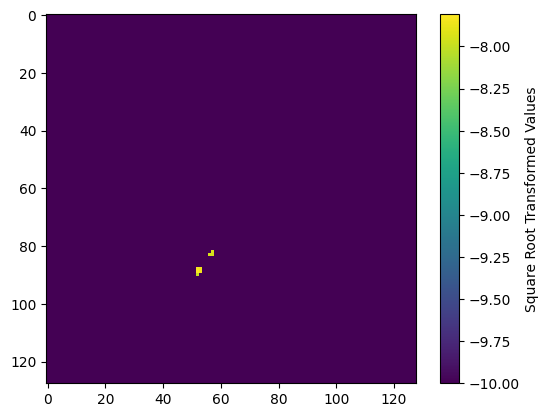

In [64]:
cartesian_data = multichannel_trilinear_interpolation_optimized(
    polar_data, 
    azimuth_indices, 
    elevation_indices, 
    range_indices
)
cartesian_data = cartesian_data.cpu()
import matplotlib.pyplot as plt
cartesian_data = np.log10(cartesian_data+0.0000000001)
plt.imshow(cartesian_data[0].mean(2), cmap='viridis', interpolation='nearest')
plt.colorbar(label='Square Root Transformed Values')

In [57]:
cartesian_data.shape

torch.Size([1, 128, 128, 10])

In [56]:
cartesian_data[0,:,:,0].max()

tensor(-5.)

In [22]:
mat3d = scipy.io.loadmat('/mnt/Kradar/K-Radar/11/radar_zyx_cube/cube_00011.mat')

In [18]:
np.percentile(mat['arrDREA']/1e+17,99)

5.748507934720039e-06

In [19]:
np.savez_compressed('/mnt/Kradar/K-Radar/11/tesseract_00002.npz',mat['arrDREA'])

In [23]:
np.load('/mnt/Kradar/K-Radar/11/tesseract_00002.npz').files

['arr_0']

In [30]:
with np.load('/mnt/Kradar/K-Radar/11/tesseract_00002.npz') as data:
    a = data['arr_0']

In [5]:
import numpy as np


In [9]:
np.save('/mnt/Kradar/K-Radar/11/tesseract_00002.npy',data)

In [10]:
np.load('/mnt/Kradar/K-Radar/11/tesseract_00002.npy')

array([[[[1.4488e+02, 6.3500e+01, 6.4312e+01, ..., 1.6125e+02,
          2.4625e+01, 4.9453e+00],
         [2.0538e+02, 1.1762e+02, 7.2938e+01, ..., 1.1938e+02,
          4.0875e+01, 8.3125e+00],
         [1.8362e+02, 1.5738e+02, 8.4875e+01, ..., 8.9938e+01,
          1.7312e+01, 3.2469e+01],
         ...,
         [1.3938e+01, 2.2500e+01, 2.1094e+01, ..., 1.3760e+03,
          1.6010e+03, 1.3080e+03],
         [7.9766e+00, 2.0859e+01, 1.4242e+01, ..., 1.7380e+03,
          2.5460e+03, 2.5360e+03],
         [3.1016e+01, 4.6406e+01, 2.6453e+01, ..., 1.6400e+03,
          2.9360e+03, 3.5060e+03]],

        [[3.2734e+00, 3.4160e+00, 2.3965e+00, ..., 1.0830e+00,
          1.2793e+00, 2.0449e+00],
         [2.5723e+00, 3.8672e+00, 4.4609e+00, ..., 9.7559e-01,
          1.0459e+00, 1.7236e+00],
         [1.0732e+00, 2.5391e+00, 4.6484e+00, ..., 6.9531e-01,
          6.3965e-01, 1.0947e+00],
         ...,
         [5.8164e+00, 6.9805e+00, 9.7344e+00, ..., 1.1750e+01,
          1.6562e+01, 1.7

In [8]:
import numpy as np

In [11]:
np.mean(mat['arrDREA'],axis=0).shape

(256, 37, 107)

In [6]:
mat['arrDREA'].shape

(64, 256, 37, 107)

In [8]:
mat['arrDREA'][:,0]

array([[[1.47386943e+15, 6.38818470e+14, 6.37655339e+14, ...,
         1.61676850e+15, 2.52786978e+14, 5.19821192e+13],
        [2.08160637e+15, 1.19314420e+15, 7.33688325e+14, ...,
         1.20334367e+15, 4.16503212e+14, 8.65598230e+13],
        [1.85043445e+15, 1.59373768e+15, 8.60354159e+14, ...,
         9.08712001e+14, 1.77776548e+14, 3.21976384e+14],
        ...,
        [1.43979702e+14, 2.29743958e+14, 2.11084640e+14, ...,
         1.37268873e+16, 1.59846539e+16, 1.30751142e+16],
        [8.47102859e+13, 2.15386419e+14, 1.44774590e+14, ...,
         1.73292685e+16, 2.53921366e+16, 2.53015536e+16],
        [3.19792595e+14, 4.77419438e+14, 2.73371011e+14, ...,
         1.63533618e+16, 2.92731399e+16, 3.49430164e+16]],

       [[1.14148004e+10, 1.10568888e+10, 1.08112200e+10, ...,
         2.90283602e+10, 2.22616289e+10, 1.80731843e+10],
        [8.42311526e+09, 7.27104461e+09, 7.35203482e+09, ...,
         3.58176072e+10, 2.75012833e+10, 2.19494420e+10],
        [7.48816947e+09, 

In [23]:
mat['arrDREA'][:,:112,:,:].shape

(64, 112, 37, 107)

In [19]:
import numpy as np
np.count_nonzero(mat['arrDREA'])/64

1013504.0

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class SphericalToCartesianCNN(nn.Module):
    def __init__(self):
        super().__init__()
        # Convolution layers with stride and padding to manage dimensionality
        self.conv1 = nn.Conv3d(in_channels=192, out_channels=128, kernel_size=(3, 3, 3), stride=(1, 1, 1), padding=(1, 1, 1))
        self.conv2 = nn.Conv3d(in_channels=128, out_channels=128, kernel_size=(3, 3, 3), stride=(1, 1, 1), padding=(1, 1, 1))
        self.conv3 = nn.Conv3d(in_channels=128, out_channels=10, kernel_size=(1, 1, 1), stride=(1, 1, 1), padding=(0, 0, 0))

    def forward(self, x):
        # Apply convolutional layers with ReLU
        x = F.relu(self.conv1(x))
        x = F.relu(self.conv2(x))
        x = self.conv3(x)  # This layer adjusts the channel dimension to 10 without altering spatial dimensions
        
        # No need for fully connected layers; reshape output directly
        x = x.permute(0, 2, 3, 4, 1)  # Rearrange dimensions to match the desired shape (if necessary)
        return x

In [4]:
data = torch.rand(1,192,128,54,19)
net = SphericalToCartesianCNN()
data = net(data)

In [5]:
data.shape

torch.Size([1, 128, 54, 19, 10])

Sparsify along Range

In [1]:
import scipy.io
import numpy as np
mat = scipy.io.loadmat('/mnt/Kradar/K-Radar/11/radar_tesseract/tesseract_00034.mat')
data = np.log10(mat['arrDREA'].astype(np.float32))
cube = data.mean(0)  # Average over all time points
# Initialize arrays to hold the indices and values for the top 25 power values in each range bin
range_inds = []
elevation_inds = []
azimuth_inds = []
power_vals = []
# Iterate over each range bin
for elevation in range(37):
    for azimuth in range(107):
        range_bin = cube[:,elevation,azimuth]
        # Find the top 25 values in the flattened range bin
        top_range_indices = np.argsort(range_bin)[-25:]
        for range_i in top_range_indices:
                range_inds.append(range_i)
                elevation_inds.append(elevation)
                azimuth_inds.append(azimuth)
                power_vals.append(data[:, range_i, elevation, azimuth])
# Convert lists to numpy arrays
range_inds = np.array(range_inds)
elevation_inds = np.array(elevation_inds)
azimuth_inds = np.array(azimuth_inds)
power_vals = np.stack(power_vals)


In [3]:
import numpy as np
import matplotlib.pyplot as plt
def sparse_to_dense(range_inds, elevation_inds, azimuth_inds, power_vals):
    # Dimensions based on the given maximum indices
    max_range = 256
    max_elevation = 37
    max_azimuth = 107

    # Create a dense array filled with zeros
    dense_array = np.zeros((max_range, max_elevation, max_azimuth))

    # Populate the dense array with power values
    for r, e, a, p in zip(range_inds, elevation_inds, azimuth_inds, power_vals.max(1)):
        dense_array[r, e, a] = p

    return dense_array

# Convert to dense array
dense_array = sparse_to_dense(range_inds, elevation_inds, azimuth_inds, power_vals)


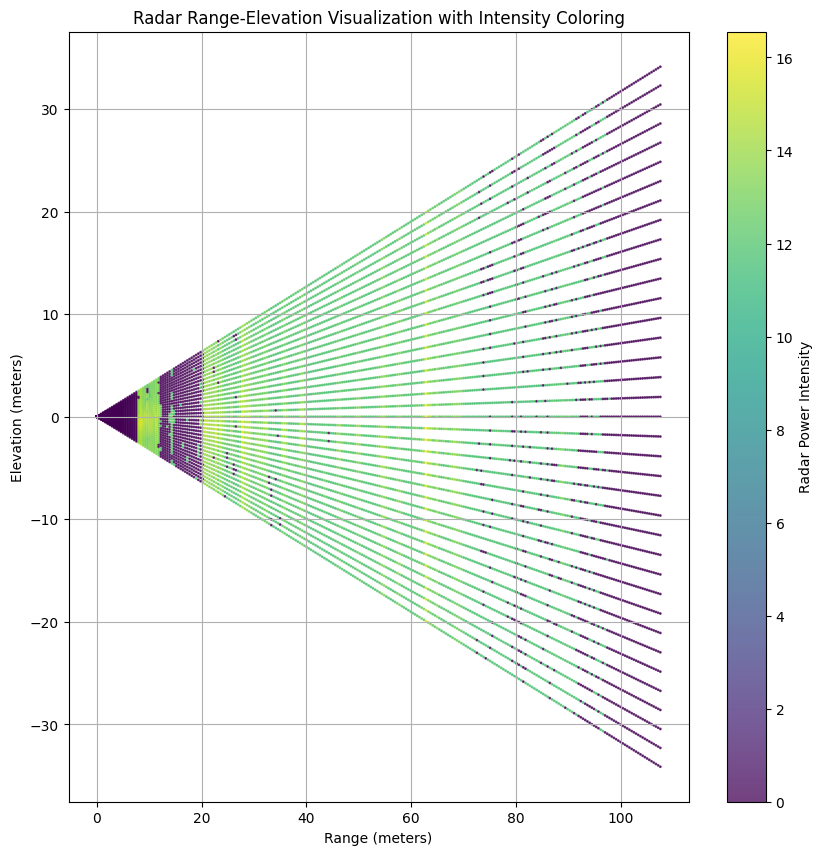

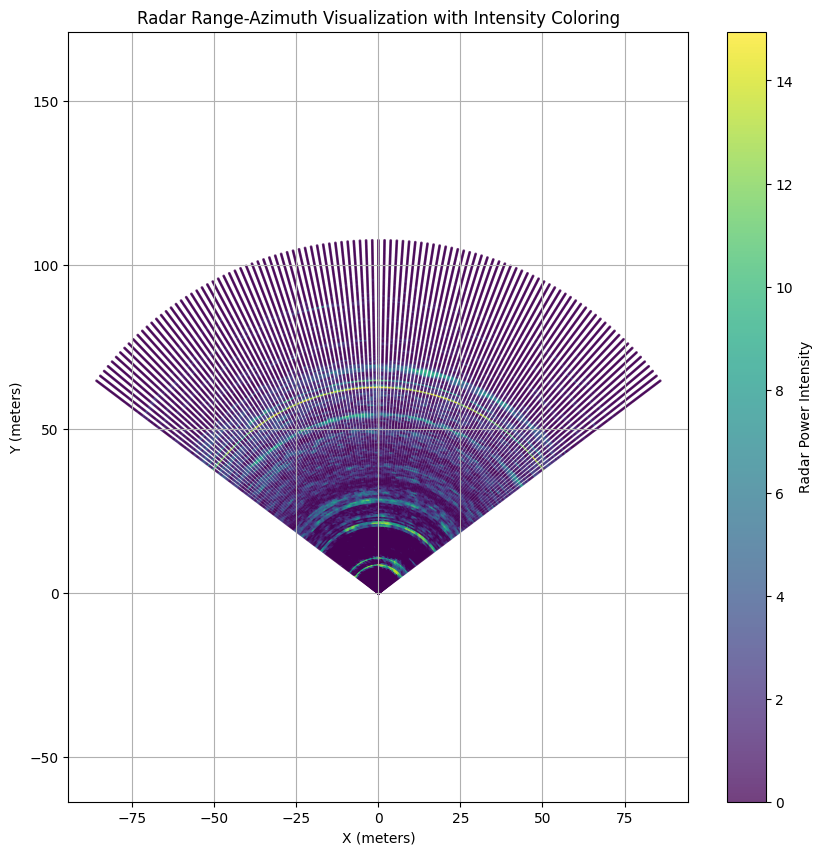

In [4]:
def plot_range_elevation_with_intensity_corrected(radar_data, range_resolution, elevation_degrees):
    ranges = radar_data.shape[0]
    elevations = radar_data.shape[1]

    # Range and elevation values
    r = np.linspace(0, ranges * range_resolution, ranges)
    elevation = np.radians(np.linspace(-elevation_degrees / 2, elevation_degrees / 2, elevations))

    # Create meshgrid for range and elevation
    R, Elevation = np.meshgrid(r, elevation, indexing='ij')

    # Convert polar (range, elevation) to Cartesian coordinates for visualization
    X = R  # Range as horizontal component
    Y = R * np.sin(Elevation)  # Vertical component based on elevation

    # Use average intensity across all azimuths for each range-elevation pair
    intensities = radar_data  # Average across azimuths

    # Flattening the arrays for plotting
    x_values = X.flatten()
    y_values = Y.flatten()
    intensities = intensities.flatten()  # Matched intensity values

    plt.figure(figsize=(10, 10))
    scatter = plt.scatter(x_values, y_values, c=intensities, s=1, alpha=0.75, cmap='viridis')
    plt.colorbar(scatter, label='Radar Power Intensity')
    plt.xlabel('Range (meters)')
    plt.ylabel('Elevation (meters)')
    plt.title('Radar Range-Elevation Visualization with Intensity Coloring')
    plt.grid(True)
    plt.show()
def plot_range_azimuth_with_intensity(radar_data, range_resolution, azimuth_degrees):
    ranges = radar_data.shape[0]
    azimuths = radar_data.shape[1]

    # Range and azimuth values
    r = np.linspace(0, ranges * range_resolution, ranges)
    azimuth = np.radians(np.linspace(-azimuth_degrees / 2, azimuth_degrees / 2, azimuths))

    # Create meshgrid for range and azimuth
    R, Azimuth = np.meshgrid(r, azimuth, indexing='ij')

    # Convert polar to Cartesian coordinates
    X = R * np.sin(Azimuth)
    Y = R * np.cos(Azimuth)

    # Flattening the arrays for plotting
    x_values = X.flatten()
    y_values = Y.flatten()
    intensities = radar_data.flatten()  # Middle elevation slice

    plt.figure(figsize=(10, 10))
    scatter = plt.scatter(x_values, y_values, c=intensities, s=1, alpha=0.75, cmap='viridis')
    plt.colorbar(scatter, label='Radar Power Intensity')
    plt.axis('equal')
    plt.xlabel('X (meters)')
    plt.ylabel('Y (meters)')
    plt.title('Radar Range-Azimuth Visualization with Intensity Coloring')
    plt.grid(True)
    plt.show()

# Call the corrected function with the example radar data, focusing on range and elevation
plot_range_elevation_with_intensity_corrected(np.array(dense_array.max(2)), 0.42, 37)
plot_range_azimuth_with_intensity(np.array(dense_array.mean(1)), 0.42, 106)


sparsify along AE plane 

In [34]:
cube = mat['arrDREA']
cube = cube.mean(0)
cube = np.log10(cube)


In [35]:
cube_flat = cube.reshape(cube.shape[0], -1)  # Flattens elevation and azimuth into one dimension

# Step 2: Use np.partition to find the indices of the top k values in each flattened range bin
# np.partition sorts partially so that the smallest 'k' elements come first, here we want the largest, so use a negative index
k = 100
top_k_idx = np.argpartition(cube_flat, -k, axis=1)[:, -k:]

# Step 3: Create an empty mask of the same shape as cube_flat, and fill it
mask_flat = np.zeros_like(cube_flat, dtype=bool)
range_indices = np.arange(cube_flat.shape[0])[:, None]  # Create a column vector of range indices for broadcasting
mask_flat[range_indices, top_k_idx] = True  # Set the top 25 positions to True

# Step 4: Reshape the mask to match the original shape of cube
mask = mask_flat.reshape(cube.shape)

# Step 5: Apply the mask to the original cube
result_tensor = cube * mask

range_inds = np.arange(cube.shape[0])[:, None]  # Expanded to align with the top 25 in each row
elevation_inds = top_k_idx // cube.shape[2]  # Integer division to find elevation index
azimuth_inds = top_k_idx % cube.shape[2]  # Modulo to find azimuth index

# Flatten everything to create 1D arrays of indices and values
range_inds_flat = np.repeat(range_inds, k).flatten()
elevation_inds_flat = elevation_inds.flatten()
azimuth_inds_flat = azimuth_inds.flatten()

In [36]:
mat['arrDREA'][:,range_inds_flat,elevation_inds_flat,azimuth_inds_flat].shape

(64, 25600)

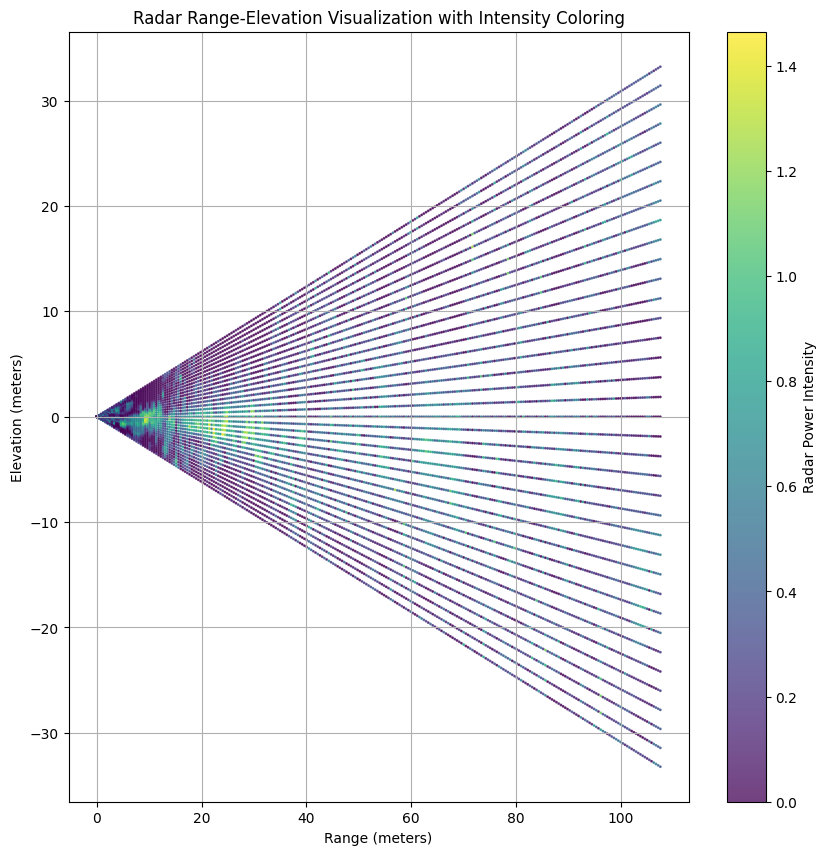

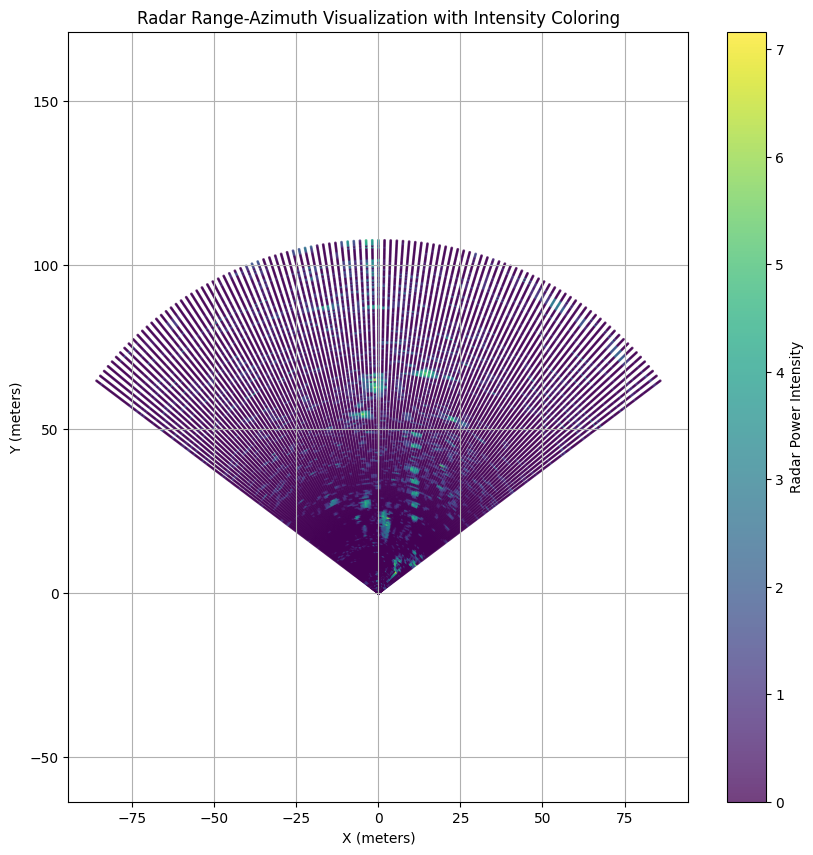

In [37]:
flat = result_tensor.mean(2)
plot_range_elevation_with_intensity_corrected(flat, 0.42, 36)
flat = result_tensor.mean(1)
plot_range_azimuth_with_intensity(flat, 0.42, 106)

sparsify using percentil 

In [12]:
cube = np.load('/mnt/18T-Data/kradar/1/radar_polar_cube/DRAE_00011.npy')
# print(cube.max(),cube.min().astype(np.float16))
cube = cube.astype(np.float16)
# print(cube.max(),cube.min())

In [71]:
cube = np.load('/mnt/18T-Data/kradar/1/radar_polar_cube/DRAE_00111.npy')

In [66]:
cube.max()

139078.7

In [69]:
cube.max(),cube.min()

(139078.7, 1.7985492e-10)

In [45]:
cube = mat['arrDREA']

In [46]:
cube.max()

1.3952519432233288e+18

In [47]:
cube.min()

344.9729919433594

In [48]:
cube = cube.astype(np.float16)

In [76]:
np.log10(cube).min()+3

-6.745078086853027

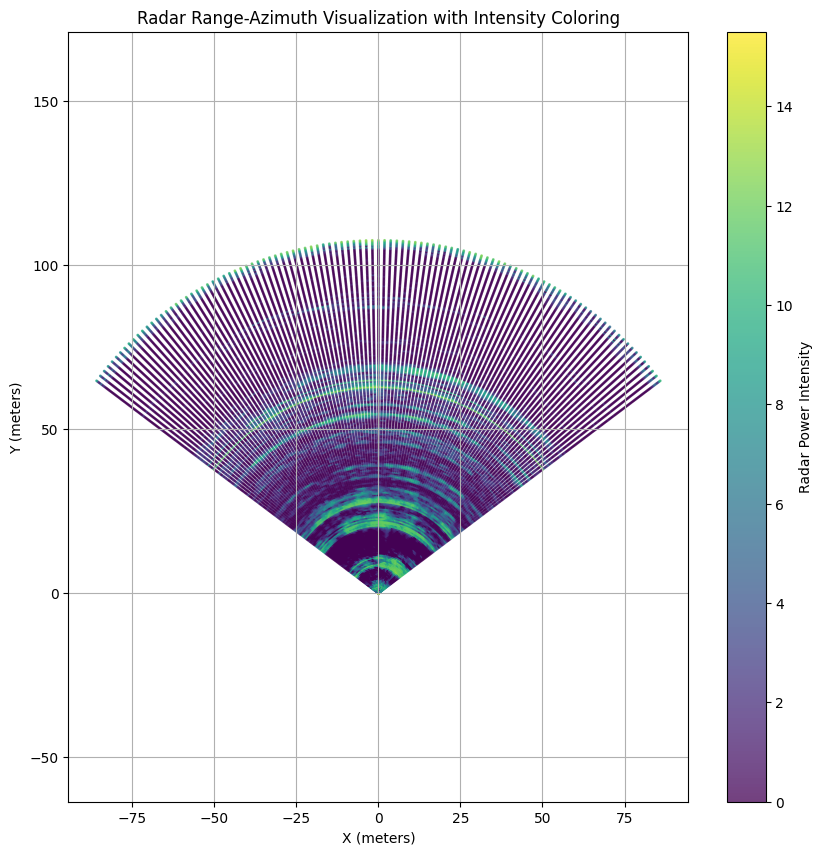

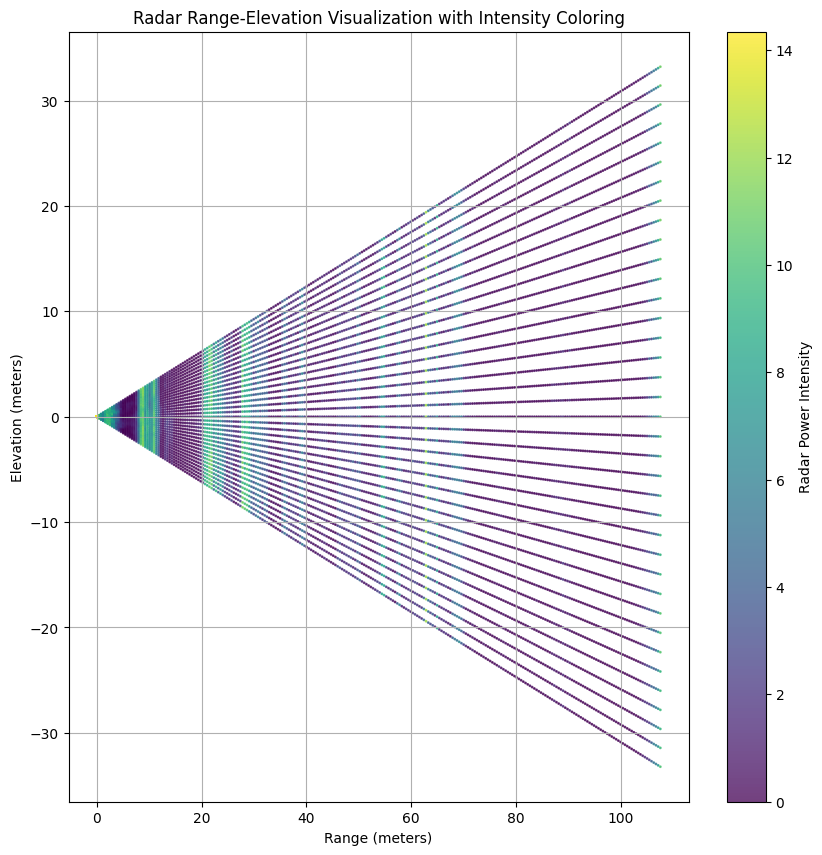

In [24]:
cube = mat['arrDREA']
cube = cube.mean(0)
cube = np.log10(cube)
# cube


mask = cube > np.percentile(cube,80)
percentil_tensor  = cube* mask
plot_range_azimuth_with_intensity(percentil_tensor.mean(1), 0.42, 106)
plot_range_elevation_with_intensity_corrected(percentil_tensor.mean(2), 0.42, 36)